# Laydown Planner - Data Analysis
Deep dive analysis of construction site laydown planning data.

## 1. Setup and Imports

In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_loader import DataLoader

print('All imports successful!')

All imports successful!


## 2. Load CSV Data

In [7]:
objects_df = pd.read_csv('../data/sample_objects.csv')
schedule_df = pd.read_csv('../data/sample_schedule.csv')

print(f'Objects: {len(objects_df)} rows')
print(f'Schedule: {len(schedule_df)} rows')

Objects: 12 rows
Schedule: 10 rows


## 3. Objects Analysis

In [8]:
print('=== Objects Overview ===')
print(f'Total Objects: {len(objects_df)}')
print(f'\nColumns: {objects_df.columns.tolist()}')
print(f'\nFirst 5 rows:')
print(objects_df.head())

=== Objects Overview ===
Total Objects: 12

Columns: ['object_id', 'name', 'category', 'width', 'length', 'height', 'weight', 'stackable', 'max_stack_height']

First 5 rows:
  object_id             name   category  width  length  height  weight  \
0    OBJ001      Cement Bags  Materials   1.00     1.0     1.5      50   
1    OBJ002      Steel Beams  Materials   0.50    12.0     0.5     500   
2    OBJ003    Wooden Planks  Materials   0.25     4.0     0.1      30   
3    OBJ004  Concrete Blocks  Materials   0.40     0.2     0.2      20   
4    OBJ005      Scaffolding  Equipment   1.50     1.5     0.2     100   

   stackable  max_stack_height  
0       True                 5  
1      False                 1  
2       True                 8  
3       True                 6  
4       True                 4  


## 4. Weight Analysis

In [12]:
if 'weight' in objects_df.columns:
    print('=== Weight Statistics ===')
    print(objects_df['weight'].describe())
    print(f'\nTotal Weight: {objects_df["weight"].sum()} kg')
    print(f'Average Weight: {objects_df["weight"].mean():.2f} kg')
else:
    print('Weight column not found in data')

=== Weight Statistics ===
count      12.000000
mean      211.000000
std       429.079565
min         2.000000
25%        23.750000
50%        50.000000
75%       125.000000
max      1500.000000
Name: weight, dtype: float64

Total Weight: 2532 kg
Average Weight: 211.00 kg


## 5. Schedule Analysis

In [13]:
print('=== Schedule Overview ===')
print(f'Total Tasks: {len(schedule_df)}')
print(f'\nColumns: {schedule_df.columns.tolist()}')
print(f'\nFirst 5 rows:')
print(schedule_df.head())

=== Schedule Overview ===
Total Tasks: 10

Columns: ['task_id', 'task_name', 'start_date', 'end_date', 'duration_days', 'required_objects', 'priority']

First 5 rows:
   task_id          task_name  start_date    end_date  duration_days  \
0  TASK001   Site Preparation  2026-03-01  2026-03-05              5   
1  TASK002    Foundation Work  2026-03-06  2026-03-20             15   
2  TASK003    Steel Structure  2026-03-21  2026-04-10             21   
3  TASK004   Concrete Pouring  2026-04-11  2026-04-25             15   
4  TASK005  Scaffolding Setup  2026-03-06  2026-05-15             71   

  required_objects priority  
0           OBJ010     High  
1    OBJ001;OBJ004     High  
2    OBJ002;OBJ007     High  
3    OBJ006;OBJ001     High  
4           OBJ005   Medium  


## 6. Install ezdxf

In [14]:
import subprocess
import sys

try:
    import ezdxf
    print('ezdxf already installed')
except ImportError:
    print('Installing ezdxf...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ezdxf'])
    import ezdxf
    print('ezdxf installed successfully')

ezdxf already installed


## 7. Load and Inspect DXF

In [15]:
import ezdxf

dxf_file = '../data/sample_laydown.dxf'

try:
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    
    print('✓ DXF file loaded successfully')
    print(f'\nDXF Information:')
    print(f'  DXF Version: {doc.dxfversion}')
    print(f'  Total entities: {len(msp)}')
    
    # Count entity types
    entity_types = {}
    for entity in msp:
        etype = entity.dxftype()
        entity_types[etype] = entity_types.get(etype, 0) + 1
    
    print(f'\nEntity types in drawing:')
    for etype, count in sorted(entity_types.items()):
        print(f'  {etype}: {count}')
        
except FileNotFoundError:
    print(f'Error: DXF file not found at {dxf_file}')
except Exception as e:
    print(f'Error loading DXF: {e}')

✓ DXF file loaded successfully

DXF Information:
  DXF Version: AC1027
  Total entities: 25

Entity types in drawing:
  LWPOLYLINE: 13
  TEXT: 12


## 8. Visualize DXF with All Shapes

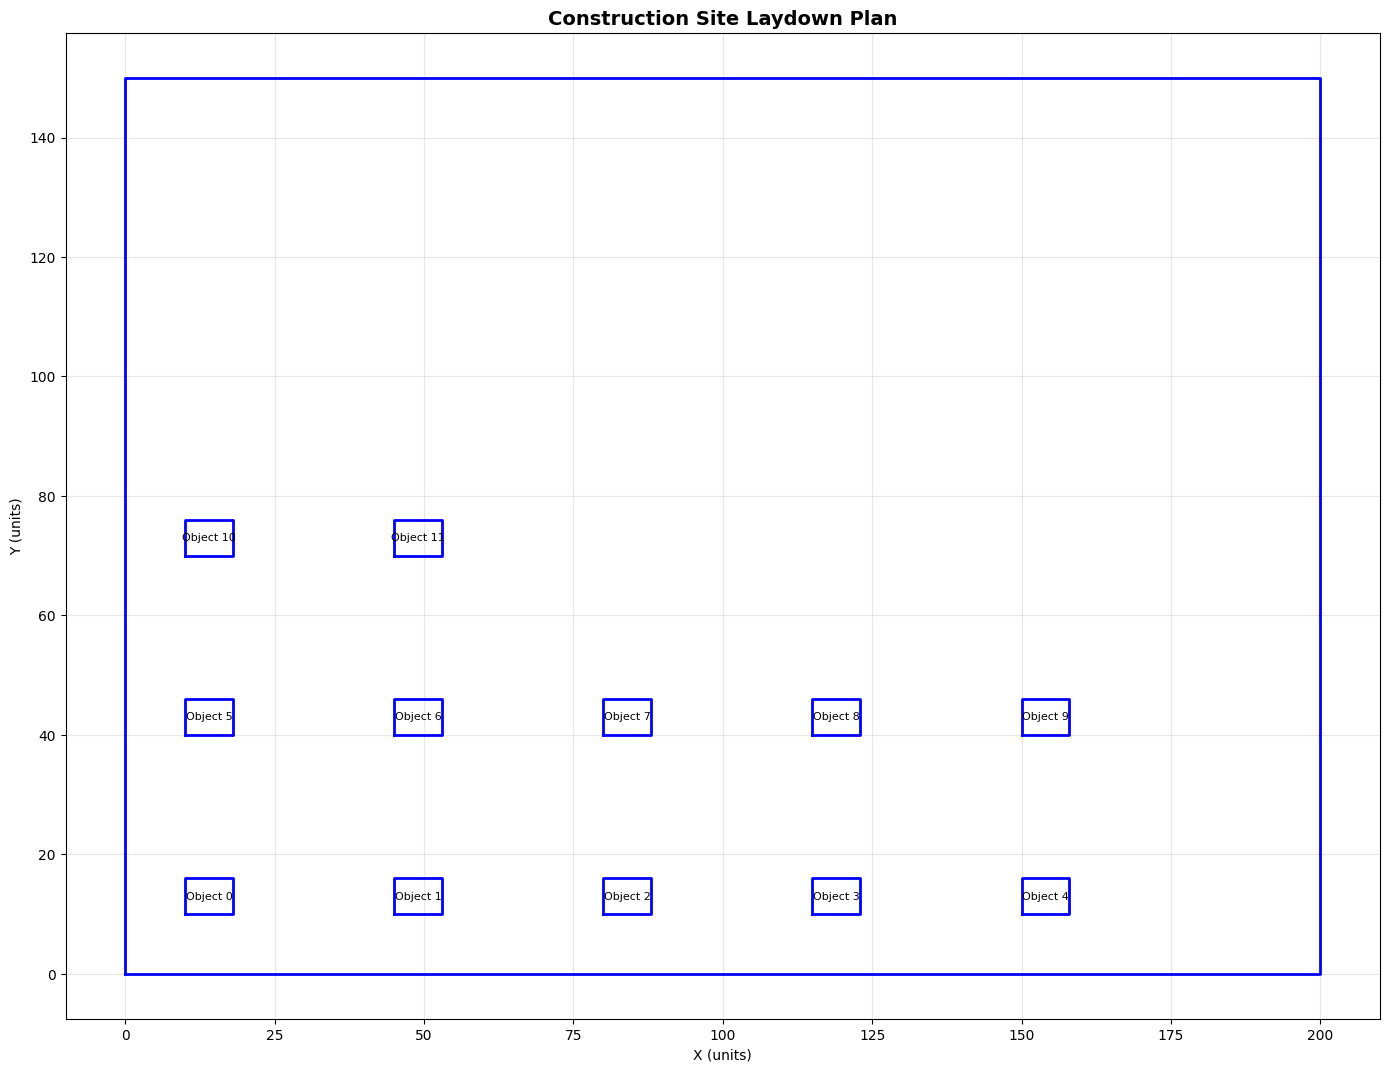

✓ DXF visualization complete


In [16]:
import ezdxf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

dxf_file = '../data/sample_laydown.dxf'

try:
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    
    fig, ax = plt.subplots(figsize=(14, 11))
    
    # Draw all entities
    for entity in msp:
        if entity.dxftype() == 'LWPOLYLINE':
            # Get all points
            points = list(entity.get_points())
            if points:
                xs = [p[0] for p in points]
                ys = [p[1] for p in points]
                ax.plot(xs, ys, 'b-', linewidth=2, label='Polylines' if entity == msp[0] else '')
        
        elif entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'g-', linewidth=1.5)
        
        elif entity.dxftype() == 'CIRCLE':
            center = entity.dxf.center
            radius = entity.dxf.radius
            circle = patches.Circle((center.x, center.y), radius, fill=False, edgecolor='r', linewidth=2)
            ax.add_patch(circle)
        
        elif entity.dxftype() == 'TEXT':
            text = entity.dxf.text
            insert = entity.dxf.insert
            height = entity.dxf.height
            ax.text(insert.x, insert.y, text, fontsize=8, ha='center', va='center')
    
    # Customize plot
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X (units)', fontsize=10)
    ax.set_ylabel('Y (units)', fontsize=10)
    ax.set_title('Construction Site Laydown Plan', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print('✓ DXF visualization complete')
    
except FileNotFoundError:
    print(f'Error: DXF file not found at {dxf_file}')
except Exception as e:
    print(f'Error visualizing DXF: {e}')
    import traceback
    traceback.print_exc()

## 9. Summary

In [ ]:
print('\n=== ANALYSIS SUMMARY ===')
print(f'Total Objects: {len(objects_df)}')
print(f'Total Tasks: {len(schedule_df)}')

if 'Weight' in objects_df.columns:
    print(f'Total Weight: {objects_df["Weight"].sum()} kg')

print('\n✓ All analyses complete!')